### Question 2
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('D:/ExcelR/Data Science/Assignments related/CSV/50_Startups.csv')

In [3]:
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#check for missing values
df1.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Since the column state is catogorical we need to change it to numerical type by One Hot encoding method
df2=pd.get_dummies(df1,columns=['State'])

In [9]:
df2.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [10]:
# Dropping the first column of Dummy Variables (State) in terms to avoid Dummy Trap 
df3=df2.drop('State_California', axis=1)
df3.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [11]:
#Changing the column names 
df4=df3.rename({'R&D Spend': 'rnd_Spend', 'Marketing Spend':'Marketing_Spend','State_New York':'State_NewYork'}, axis=1)
df4.head()

,rnd_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


## Correlation Matrix

In [12]:
df4.corr()

,rnd_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_NewYork
rnd_Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
State_Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


## Scatterplot between variables along with histograms

In [13]:
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

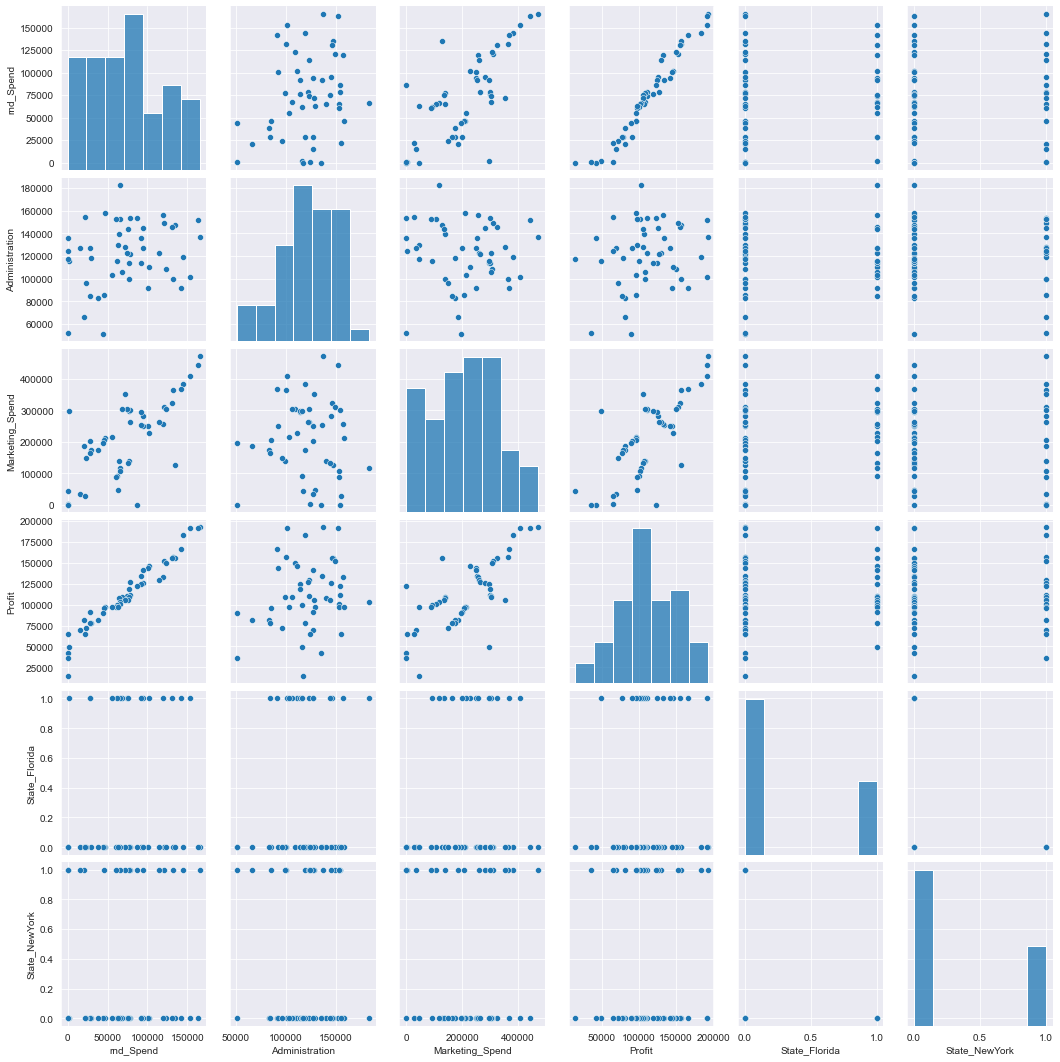

In [14]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df4)

# Preparing a model

In [15]:
#Build model
model1 = smf.ols('Profit~rnd_Spend+Administration+Marketing_Spend+State_Florida+State_NewYork', data=df4).fit()

In [16]:
#Coefficients
model1.params

Intercept          50125.343832
rnd_Spend              0.806023
Administration        -0.027004
Marketing_Spend        0.026980
State_Florida        198.788793
State_NewYork        -41.887019
dtype: float64

In [17]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept           7.280560
rnd_Spend          17.368580
Administration     -0.517012
Marketing_Spend     1.573889
State_Florida       0.058970
State_NewYork      -0.012864
dtype: float64 
 Intercept          4.444178e-09
rnd_Spend          2.578772e-21
Administration     6.077373e-01
Marketing_Spend    1.226769e-01
State_Florida      9.532429e-01
State_NewYork      9.897941e-01
dtype: float64


In [18]:
#R squared and AIC values
(model1.rsquared,model1.rsquared_adj,model1.aic)

(0.9507524843355148, 0.945156175737278, 1062.764909597834)

Looking at the pvalue above we get Multicollinearity issue in Administration (0.607), Marketing_Spend (0.122), State_Florida (0.953), and State_NewYork (0.989) varibale as their pvalues are greater than alpha (0.05)
Hence we need to check their performance in the model by SLR

## Simple Linear Regression Models

In [19]:
ml_adm =smf.ols('Profit~Administration',data=df4).fit()
#t and p-Values
print(ml_adm.tvalues, '\n', ml_adm.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [20]:
ml_mrk =smf.ols('Profit~Marketing_Spend',data=df4).fit()
#t and p-Values
print(ml_mrk.tvalues, '\n', ml_mrk.pvalues)

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [21]:
ml_sf =smf.ols('Profit~State_Florida',data=df4).fit()
#t and p-Values
print(ml_sf.tvalues, '\n', ml_sf.pvalues)

Intercept        15.689045
State_Florida     0.810861
dtype: float64 
 Intercept        1.586129e-20
State_Florida    4.214479e-01
dtype: float64


In [22]:
ml_sny =smf.ols('Profit~State_NewYork',data=df4).fit()
#t and p-Values
print(ml_sny.tvalues, '\n', ml_sny.pvalues)

Intercept        15.681647
State_NewYork     0.217428
dtype: float64 
 Intercept        1.616581e-20
State_NewYork    8.287963e-01
dtype: float64


In [23]:
ml_amss =smf.ols('Profit~Administration+Marketing_Spend+State_Florida+State_NewYork',data=df4).fit()
#t and p-Values
print(ml_amss.tvalues, '\n', ml_amss.pvalues)

Intercept          1.032926
Administration     2.426268
Marketing_Spend    7.997500
State_Florida     -0.182449
State_NewYork      0.430516
dtype: float64 
 Intercept          3.071583e-01
Administration     1.932536e-02
Marketing_Spend    3.476071e-10
State_Florida      8.560502e-01
State_NewYork      6.688755e-01
dtype: float64


Let's also check the issue by Variance Influation Factor
## VIF Values

In [24]:
rsq_rnd = smf.ols('rnd_Spend~Administration+Marketing_Spend+State_Florida+State_NewYork',data=df4).fit().rsquared
vif_rnd = 1/(1-rsq_rnd)

rsq_adm = smf.ols('Administration~rnd_Spend+Marketing_Spend+State_Florida+State_NewYork',data=df4).fit().rsquared
vif_adm = 1/(1-rsq_adm)

rsq_mar = smf.ols('Marketing_Spend~rnd_Spend+Administration+State_Florida+State_NewYork',data=df4).fit().rsquared
vif_mar = 1/(1-rsq_mar)

rsq_sf = smf.ols('State_Florida~rnd_Spend+Administration+Marketing_Spend+State_NewYork',data=df4).fit().rsquared
vif_sf = 1/(1-rsq_sf)
 
rsq_sny = smf.ols('State_NewYork~rnd_Spend+Administration+Marketing_Spend+State_Florida',data=df4).fit().rsquared
vif_sny = 1/(1-rsq_sny)

# Storing vif values in a data frame
T1 = {'Variables':['rnd_Spend','Administration','Marketing_Spend','State_Florida','State_NewYork'],'VIF':[vif_rnd,vif_adm,vif_mar,vif_sf,vif_sny]}
Vif_frame = pd.DataFrame(T1)  
Vif_frame

,Variables,VIF
0,rnd_Spend,2.495511
1,Administration,1.177766
2,Marketing_Spend,2.416797
3,State_Florida,1.387641
4,State_NewYork,1.335061


In VIF values we don't find any Multicollinearity issue hence let's go for 
## Residual Analysis
## Test for Normality of Residuals (Q-Q Plot)

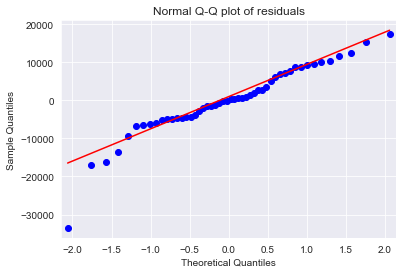

In [25]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

Looking at the Q-Q plot we can say that Data points are following the Normal distribution however we can also detect the ouliers there which we will find out below. 

In [26]:
list(np.where(model1.resid>15000))

[array([36, 45], dtype=int64)]

As we can see above there are two observations which are outliers however we will confirm those by methods like Cook's Distance, Hat Point

## Model Validation Technique 
### Residual Plot - Fitted Vs Residuals (Ei Vs Y^)

In [27]:
def get_standardized_values( values ):
    return (values - values.mean())/values.std()

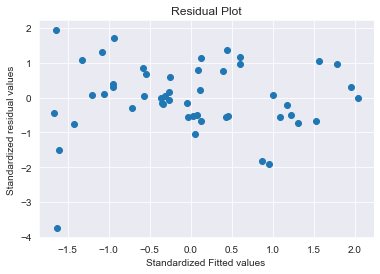

In [28]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Since we can see a pattern we can say that this is not the perfect model we should go for, as it has ouliers detected which we haven't yet treated. Let's start treating them, 

## Model Deletion Diagnostics
### Detecting Influencers/Outliers

## 1) Cook’s Distance

In [29]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

In [30]:
model1_influence.cooks_distance

(array([7.67941281e-06, 3.96002384e-03, 2.78948395e-02, 2.35705108e-02,
        1.40231490e-02, 1.17098970e-02, 2.49314176e-03, 4.16542624e-03,
        7.29467176e-05, 6.31415598e-03, 2.21391699e-02, 1.93512168e-02,
        2.13263552e-02, 7.40092001e-03, 7.20165958e-02, 4.34157410e-02,
        1.57591120e-02, 4.33058862e-03, 3.43997076e-03, 3.28909738e-02,
        7.03247647e-04, 1.17002661e-02, 3.52541534e-03, 3.68801928e-04,
        5.07030667e-03, 4.16365620e-03, 5.79414020e-03, 3.25030423e-02,
        1.07438091e-03, 1.14685871e-04, 2.67092819e-05, 4.26003186e-06,
        6.55180125e-04, 2.69550649e-04, 2.09894518e-02, 8.32171521e-03,
        5.92471519e-02, 7.19280440e-05, 5.58017593e-02, 1.60830329e-03,
        2.27122555e-03, 2.19513492e-03, 1.66164967e-04, 2.33988898e-02,
        1.16697070e-04, 9.43947846e-02, 4.23233340e-02, 4.48153392e-03,
        1.56376134e-01, 2.63959436e-01]),
 array([1.        , 0.99999968, 0.99989624, 0.99993671, 0.99998634,
        0.999992  , 0.9999

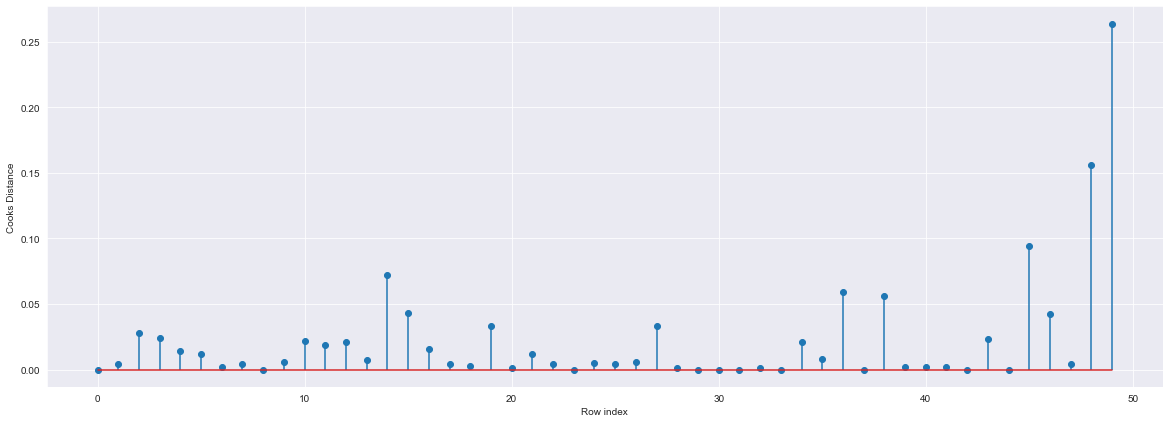

In [31]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2639594358718258)

## 2) High Influence points or Hat Points

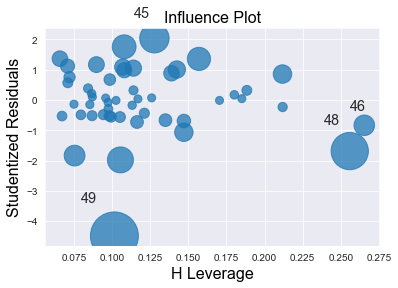

In [33]:
influence_plot(model1)
plt.show()

### From the above plot, it is evident that data point 14, 19, 27, 36, 38, 45, 46, 48, and 49 are the influencers

In [34]:
df4[df4.index.isin([14, 19, 27, 36, 38, 45, 46, 48, 49])]

,rnd_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_NewYork
14,119943.24,156547.42,256512.92,132602.65,1,0
19,86419.70,153514.11,0.00,122776.86,0,1
27,72107.60,127864.55,353183.81,105008.31,0,1
36,28663.76,127056.21,201126.82,90708.19,1,0
38,20229.59,65947.93,185265.10,81229.06,0,1
45,1000.23,124153.04,1903.93,64926.08,0,1
46,1315.46,115816.21,297114.46,49490.75,1,0
48,542.05,51743.15,0.00,35673.41,0,1
49,0.00,116983.80,45173.06,14681.40,0,0


In [35]:
#Let's check the differences in Price, CC and other variable values
#df4.head(20)

Let's remove the above outliers and 
## Improve the model 

In [36]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df5=df4.drop(df4.index[[14, 19, 27, 36, 38, 45, 46, 48, 49]],axis=0).reset_index()

In [37]:
#df5

In [38]:
#Drop the original index
df5=df5.drop(['index'],axis=1)

In [39]:
#df5

## Now Let's build a model 

In [40]:
final_model1=smf.ols('Profit~rnd_Spend+Administration+Marketing_Spend+State_Florida+State_NewYork', data=df5).fit()

In [41]:
#Generating R-Squared and AIC values
(final_model1.rsquared,final_model1.rsquared_adj,final_model1.aic)

(0.9746410326861805, 0.9710183230699206, 838.5083722503791)

## Cook's Distance for 2nd model

In [42]:
model_influence_f1 = final_model1.get_influence()
(c_f1, _) = model_influence_f1.cooks_distance

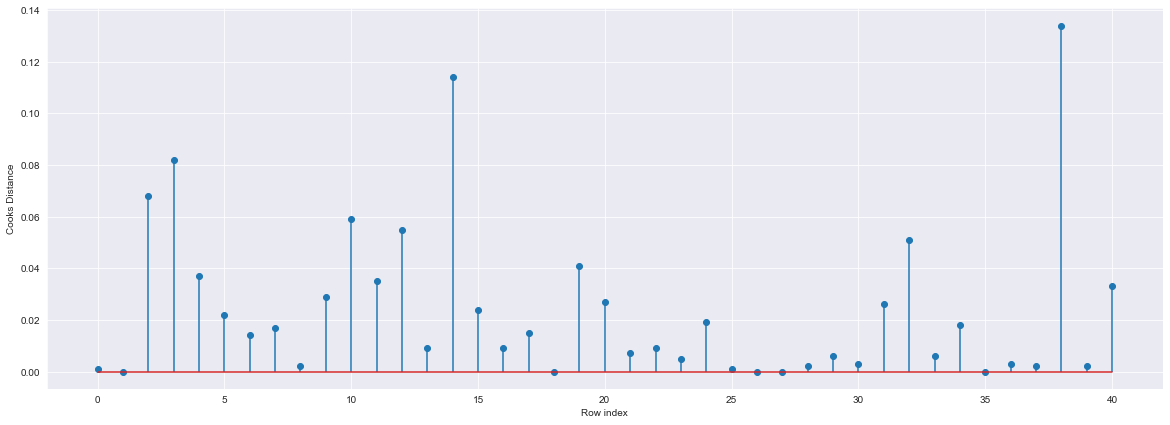

In [43]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df5)),np.round(c_f1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
#index of the data points where c is more than .5
(np.argmax(c_f1),np.max(c_f1))

(38, 0.13377197935560756)

In [45]:
df5[df5.index.isin([14,38,40])]

,rnd_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_NewYork
14,114523.61,122616.84,261776.23,129917.04,0,1
38,15505.73,127382.30,35534.17,69758.98,0,1
40,0.00,135426.92,0.00,42559.73,0,0


In [46]:
df6=df5.drop(df4.index[[14, 38, 40]],axis=0).reset_index()
#df6

In [47]:
df6=df6.drop(['index'],axis=1)
#df6

In [48]:
final_model2=smf.ols('Profit~rnd_Spend+Administration+Marketing_Spend+State_Florida+State_NewYork', data=df6).fit()

In [49]:
#Generating R-Squared and AIC values
(final_model2.rsquared,final_model2.rsquared_adj,final_model2.aic)

(0.9780753224521551, 0.9746495915853044, 768.5364580282194)

## Cook's Distance for 3rd model 

In [50]:
model_influence_f2 = final_model2.get_influence()
(c_f2, _) = model_influence_f2.cooks_distance

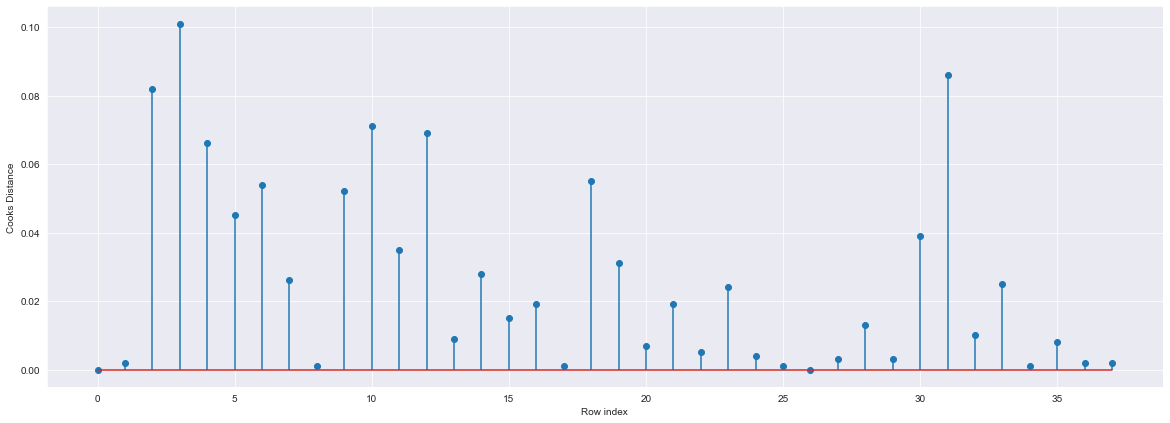

In [51]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df6)),np.round(c_f2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [52]:
#index of the data points where c is more than .5
(np.argmax(c_f2),np.max(c_f2))

(3, 0.10089617787962403)

## Since the C value (0.1) is < 1 , we can stop the diagnostic process and finalize the model
Also comapring the 1st model's and final model's R square and AIC values we understand that R square value has increased and AIC value has decreased in Final model, which states that the Final model is good and ready to predict for new data points. 

## Predicting for new data

In [53]:
#New data for prediction
new_data1=pd.DataFrame({'rnd_Spend':142107.34,'Administration':91391.77,'Marketing_Spend':366168.42,'State_Florida':1,"State_NewYork":0},index=[1])

In [54]:
final_model2.predict(new_data1)

1    173151.82149
dtype: float64